# General requirements for the assignment

- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Tag the commit as *Final submission of Assignment 2*
- Submit through GitHub
- Provide your GitHub url to the Ipython notebook as the submisison for Brightspace assignment 2
- Post (interesting) errors in the course Github's issue page

# Assignment Intro

In this assignment, you will be asked to implement some functionalities on the dataset that you worked with in the first assignment.

### DEADLINE FOR THIS ASSIGNMENT IS 01 OCTOBER 2021 BEFORE 23:59

<hr />

## Import libraries
Update this list as you go along the assigment

In [1]:
# YOUR CODE HERE
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy.signal import find_peaks

## Preparing data

### 1. Read 2020 and 2021 data for your selected country. You only need provincial data for this assignment. Print the first 5 lines of data

In [2]:
# Read the provincial data from the previous assignment
df = pd.read_csv('Region_Mobility_Report_CSVs\processed_data\CO_province.csv')

# Show the first 5 lines of the dataframe from the previous assignment
df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,321,CO,Colombia,Amazonas,NaN,NaN,CO-AMA,NaN,ChIJuR67ovBG5JERmc75jvwzR3U,2020-02-15,-9.0,-13.0,-10.0,NaN,10.0,NaN
1,322,CO,Colombia,Amazonas,NaN,NaN,CO-AMA,NaN,ChIJuR67ovBG5JERmc75jvwzR3U,2020-02-16,-13.0,NaN,-8.0,NaN,NaN,NaN
2,323,CO,Colombia,Amazonas,NaN,NaN,CO-AMA,NaN,ChIJuR67ovBG5JERmc75jvwzR3U,2020-02-17,-15.0,-14.0,-14.0,NaN,11.0,NaN
3,324,CO,Colombia,Amazonas,NaN,NaN,CO-AMA,NaN,ChIJuR67ovBG5JERmc75jvwzR3U,2020-02-18,-15.0,-24.0,-16.0,NaN,10.0,NaN
4,325,CO,Colombia,Amazonas,NaN,NaN,CO-AMA,NaN,ChIJuR67ovBG5JERmc75jvwzR3U,2020-02-19,-13.0,-24.0,-10.0,NaN,8.0,NaN


### 2. For this assignment, select and extract the data for a single province. Name the dataframe for this subset `df_province_selected`

In [3]:
# Create a dataframe for the province Bogota
df_province_selected = df[df['sub_region_1'] == 'Bogota']

# Show the last 5 lines of the dataframe for the province Bogota
df_province_selected.tail()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
11018,18302,CO,Colombia,Bogota,NaN,NaN,CO-DC,NaN,ChIJZ0-SYJsAP44RBHEcWTjKX1U,2021-08-28,-1.0,28.0,6.0,30.0,17.0,3.0
11019,18303,CO,Colombia,Bogota,NaN,NaN,CO-DC,NaN,ChIJZ0-SYJsAP44RBHEcWTjKX1U,2021-08-29,-8.0,14.0,-3.0,28.0,20.0,4.0
11020,18304,CO,Colombia,Bogota,NaN,NaN,CO-DC,NaN,ChIJZ0-SYJsAP44RBHEcWTjKX1U,2021-08-30,-9.0,24.0,-4.0,15.0,-9.0,11.0
11021,18305,CO,Colombia,Bogota,NaN,NaN,CO-DC,NaN,ChIJZ0-SYJsAP44RBHEcWTjKX1U,2021-08-31,-9.0,28.0,-9.0,19.0,-6.0,11.0
11022,18306,CO,Colombia,Bogota,NaN,NaN,CO-DC,NaN,ChIJZ0-SYJsAP44RBHEcWTjKX1U,2021-09-01,-7.0,33.0,0.0,16.0,-11.0,10.0


### 3. Aggregated measurements

#### Write a function with the following arguments as the input:
- a dataset as a dataframe object
- list of attributes (refers to df.columns)
- a year
- one of the following statistic measurements: mean/median/max/min. You can use [enum](https://docs.python.org/3/library/enum.html) for this argument.
  
The function will then return the required statistic on some attributes of the data for a particular year.

In [4]:
# # modify the following line to make the function calculate the 'mean' when the statistic argument is empty.
def calculate_statistic(data, attributes, year, statistic):
    """calculate a statistic

    Args:
        data (Pandas DataFrame): dataset
        attributes (list): list of attributes
        year (int): either 2020 or 2021
        statistic (str): the statistic to calculate: mean/median/max/min
    """
    # YOUR CODE HERE
    data['datetime'] = pd.to_datetime(data['date'])
    data_year = data[data['datetime'].dt.year == year]
    if statistic == 'mean':
        for attribute in attributes:
            att_mean = data_year[attribute].mean()
            print(f'The mean of {attribute} is {att_mean:.1f}')
    if statistic == 'median':
        for attribute in attributes:
            att_median = data_year[attribute].median()
            print(f'The median of {attribute} is {att_median:.1f}')
    if statistic == 'max':
        for attribute in attributes:
            att_max = data_year[attribute].max()
            print(f'The max of {attribute} is {att_max:.1f}')
    if statistic == 'min':
        for attribute in attributes:
            att_min = data_year[attribute].min()
            print(f'The min of {attribute} is {att_min:.1f}')
    else:
        for attribute in attributes:
            att_mean = data_year[attribute].mean()
            print(f'The mean of {attribute} is {att_mean:.1f}')

#### Call your calculate_statistic function and print the results with three different input arguments

In [5]:
# Call the function and print results with three different input arguments
calculate_statistic(df_province_selected, ['parks_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'], 2020, '')

The mean of parks_percent_change_from_baseline is -36.9
The mean of workplaces_percent_change_from_baseline is -35.5
The mean of residential_percent_change_from_baseline is 20.8


<ipython-input-4-836f956584bb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['date'])


## Activity changes

Since there are quite some noises when looking at daily data, it is easier to observe data on a larger aggregation level. The following code derives 7-day averages for the provice data. We also prepare a plot to visualise it for you.

In [6]:
df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])
df_province_agg = df_province_selected.resample('7D', on='date').mean()
df_province_agg.reset_index(inplace=True)
df_province_agg.head()

<ipython-input-6-3d1378534e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province_selected['date'] = pd.to_datetime(df_province_selected['date'])


,date,Unnamed: 0,sub_region_2,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,22183,NaN,NaN,NaN,0.285714,3.428571,4.285714,6.285714,12.000000,-1.142857
1,2020-02-22,22190,NaN,NaN,NaN,-2.857143,0.142857,-1.571429,7.857143,12.428571,-1.000000
2,2020-02-29,22197,NaN,NaN,NaN,6.428571,10.571429,7.714286,12.285714,14.714286,-2.571429
3,2020-03-07,22204,NaN,NaN,NaN,-2.000000,3.714286,-0.714286,8.857143,13.000000,-1.000000
4,2020-03-14,22211,NaN,NaN,NaN,-27.428571,4.285714,-21.714286,-25.428571,-19.142857,13.571429


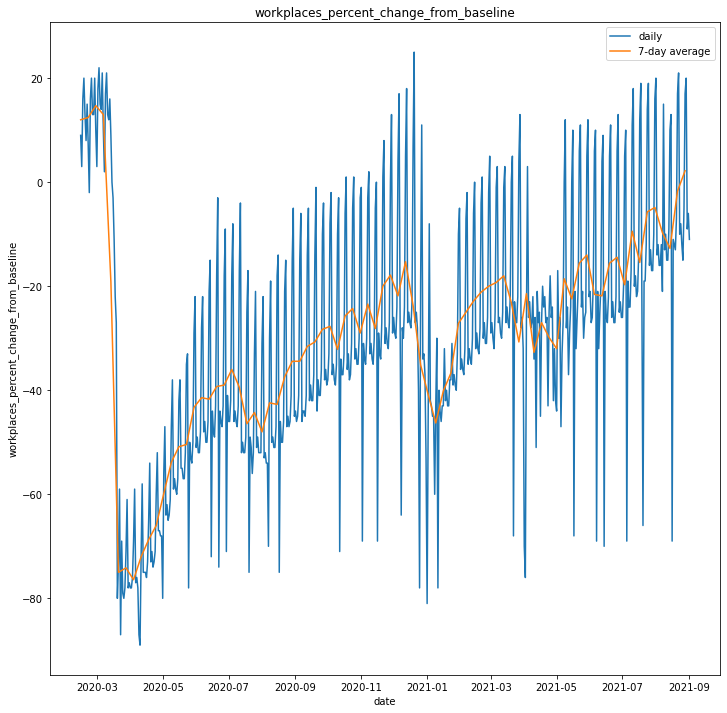

In [7]:
#Code to visualise the raw data and sampled data
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('workplaces_percent_change_from_baseline')
sns.lineplot(x='date', y='workplaces_percent_change_from_baseline', data=df_province_selected, label='daily', ax=ax)
sns.lineplot(data=df_province_agg, x='date', y='workplaces_percent_change_from_baseline', label='7-day average', ax=ax)
plt.show()

## Identifying peaks

Let's focus on the 7-day averaged data. This averaged time series data shows how many times workplace changes reach peaks. Your task is to identify these moments. 

### 4. Identify peaks with personal code

Complete the function below. Your function should return (at least) a list of indexes where there are peaks in data.

In [8]:
def my_find_peaks(data, activity, **kwargs):
    """[summary]

    Args:
        data (dataframe): dataframe with at least two attribute columns: date and the given activity
        activity (str): one of the (six) available mobility activities
        kwargs: a dictionary of arguments. Use these to customise your function on finding peaks
    """
    # YOUR CODE HERE
    max_ind = []
    index_0 = data[activity].iloc[0]
    index_1 = data[activity].iloc[1]
    index_2 = 0
    for i in data.index:
        if i != 0 and i != 1:
            index_2 = data[activity].iloc[i]
            if index_1 > index_2 and index_1 > index_0:
                max_ind.append(i - 1)
            index_0 = index_1
            index_1 = index_2
    return max_ind

In [9]:
activity = 'grocery_and_pharmacy_percent_change_from_baseline'

max_ind = my_find_peaks(
    df_province_agg,
    activity = 'grocery_and_pharmacy_percent_change_from_baseline'
)
max_ind

[2,
 4,
 6,
 8,
 13,
 15,
 20,
 23,
 28,
 32,
 37,
 41,
 44,
 50,
 54,
 56,
 59,
 61,
 65,
 67,
 71,
 73,
 76]

In [10]:
# Assign the data related to the max_ind to df_max
# a = pd.DataFrame({'peaks indeces': max_ind})
df_max = df_province_agg.iloc[max_ind]

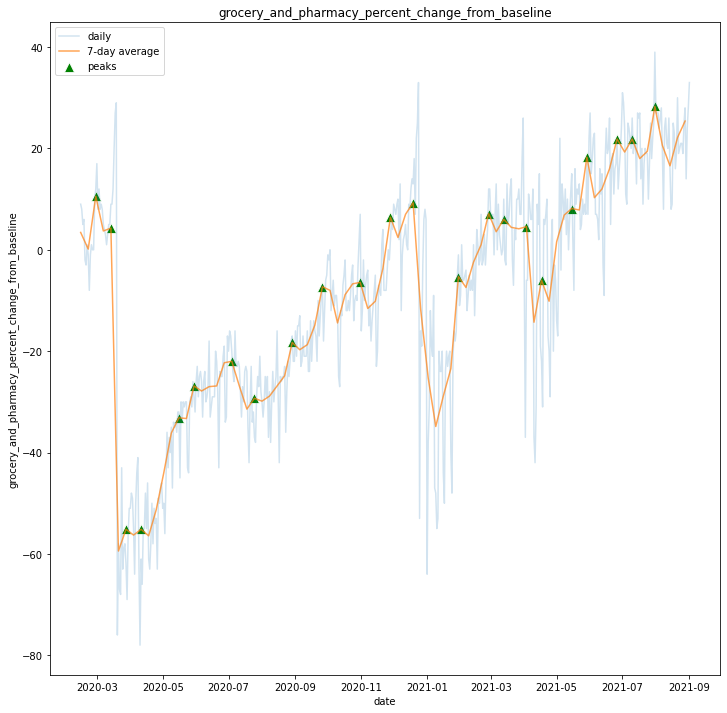

In [11]:
#Code to visualise the raw data, sampled data and the peaks
# create a figure and an axis to plot
fig, ax = plt.subplots(figsize=(12, 12))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
plt.show()

### 5. Identify peaks using library scipy - [find_peaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

In [12]:
# YOUR CODE HERE
peaks = find_peaks(df_province_agg['grocery_and_pharmacy_percent_change_from_baseline'])[0]

for peak in peaks:
    print(f'A peak is located at index: {peak}')

A peak is located at index: 2
A peak is located at index: 4
A peak is located at index: 6
A peak is located at index: 8
A peak is located at index: 13
A peak is located at index: 15
A peak is located at index: 20
A peak is located at index: 23
A peak is located at index: 28
A peak is located at index: 32
A peak is located at index: 37
A peak is located at index: 41
A peak is located at index: 44
A peak is located at index: 50
A peak is located at index: 54
A peak is located at index: 56
A peak is located at index: 59
A peak is located at index: 61
A peak is located at index: 65
A peak is located at index: 67
A peak is located at index: 71
A peak is located at index: 73
A peak is located at index: 76


### 6. Identify valleys

You have identified the peaks in the data above using both your personal approach and the scipy library. Here, you can also identify the valleys (or troughs) using either of these approaches.

In [13]:
# YOUR CODE HERE
valleys = find_peaks(-df_province_agg['grocery_and_pharmacy_percent_change_from_baseline'])[0]
valleys_list = valleys.tolist()
df_min = df_province_agg.iloc[valleys_list]

### 7. Identify all the peaks (and potentially valleys) for all the activities in the data. Print out the peaks for each of the activities. 

If you are brave, you can make use of the plotting piece of code that is provided above to plot the results.



Activity: grocery_and_pharmacy_percent_change_from_baseline
Max_ind:  [2, 4, 6, 8, 13, 15, 20, 23, 28, 32, 37, 41, 44, 50, 54, 56, 59, 61, 65, 67, 71, 73, 76]
Min_ind:  [ 1  3  5  7  9 14 16 22 24 29 34 38 42 47 51 55 58 60 62 66 68 72 74 78]


Activity: parks_percent_change_from_baseline
Max_ind:  [2, 20, 25, 29, 33, 35, 44, 57, 59, 61, 67, 73, 76, 79]
Min_ind:  [ 1  5 22 26 31 34 39 47 56 58 60 62 69 75 78]


Activity: transit_stations_percent_change_from_baseline
Max_ind:  [2, 20, 23, 33, 36, 38, 41, 43, 54, 56, 59, 61, 67, 73, 76]
Min_ind:  [ 7 22 24 34 37 39 42 47 55 58 60 63 68 74 78]


Activity: workplaces_percent_change_from_baseline
Max_ind:  [2, 6, 16, 20, 23, 25, 33, 36, 38, 41, 43, 56, 59, 61, 64, 67, 71, 73, 76]
Min_ind:  [ 5  7 17 22 24 26 34 37 39 42 47 58 60 63 65 69 72 74 78]


Activity: residential_percent_change_from_baseline
Max_ind:  [1, 5, 7, 22, 24, 35, 38, 47, 58, 60, 63, 68, 72, 74, 78]
Min_ind:  [ 2  6 20 23 33 37 44 54 59 61 67 71 73 76]


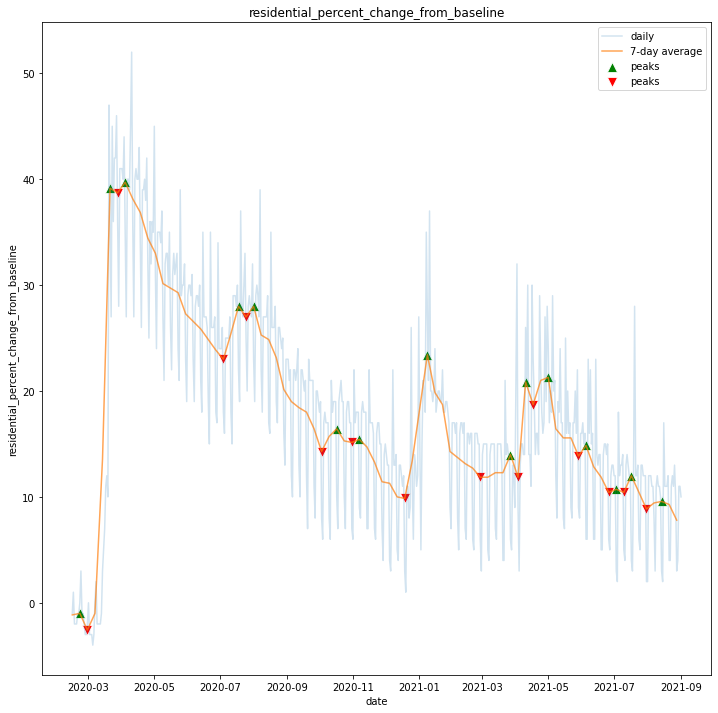

In [24]:
activities = df_province_agg.columns.tolist()[6:]
for activity in activities:
    print('\n')
    print('Activity: ' + activity)
    max_ind = my_find_peaks(df_province_agg, activity)
    min_ind = find_peaks(-df_province_agg[activity])[0]
    print('Max_ind: ', max_ind)
    print('Min_ind: ', min_ind)
    df_max = df_province_agg.iloc[max_ind, :]
    df_min = df_province_agg.iloc[min_ind, :]

fig, ax = plt.subplots(figsize=(12, 12))
# set the title of the plot
ax.set_title(activity)
# plot the daily values
sns.lineplot(x='date', y=activity, data=df_province_selected, label='daily', ax=ax, alpha=0.2)
# plot the 7-day average
sns.lineplot(data=df_province_agg, x='date', y=activity, label='7-day average', ax=ax, alpha=0.7)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_max, label='peaks', ax=ax, marker='^', color='g', s=100)
# label the peaks
sns.scatterplot(x='date', y=activity, data=df_min, label='peaks', ax=ax, marker='v', color='r', s=100)
plt.show()

### 8. Is there any common dates (or periods) among these peaks (and/or valleys) of different activities

*Food for thoughts*:
- One of the most naive way to find the overlapping dates is to look for common indexes (or dates) of the peaks/valleys
- A more general solution is to have a tolerance level between the days. For example, Sep 19 and Sep 20 can be considered matched (or overlapped) if the tolerance level is at least one day.

In [30]:
max_ind1 = my_find_peaks(
    df_province_agg, 
    activity = 'retail_and_recreation_percent_change_from_baseline'
)
max_ind2 = my_find_peaks(
    df_province_agg, 
    activity = 'grocery_and_pharmacy_percent_change_from_baseline'
)
max_ind3 = my_find_peaks(
    df_province_agg, 
    activity = 'parks_percent_change_from_baseline'
)
max_ind4 = my_find_peaks(
    df_province_agg, 
    activity = 'transit_stations_percent_change_from_baseline'
)
max_ind5 = my_find_peaks(
    df_province_agg, 
    activity = 'workplaces_percent_change_from_baseline'
)
max_ind6 = my_find_peaks(
    df_province_agg, 
    activity = 'residential_percent_change_from_baseline'
)

a = (max_ind1, max_ind2, max_ind3, max_ind4, max_ind5, max_ind6)
b = set(max_ind1)
c = set(max_ind2)
d = set(max_ind3)
e = set(max_ind4)
f = set(max_ind5)
g = set(max_ind6)
h = list(b.intersection(c, d, e, f))

print(f'The following indeces are overlapping dates of the peaks/valleys: {h}')

The following indeces are overlapping dates of the peaks/valleys: [2, 67, 73, 76, 20, 59, 61]


## OPTIONAL

Append population/density for provinces/municipalities to the dataframe. The data for Netherlands is available [here](https://www.cbs.nl/en-gb/news/2021/30/population-growth-picks-up-again)


In [ ]:
# YOUR CODE HERE
